## 1° Qual o Problema de Negócio?

Criar uma Máquinas Preditivas cujo objetivo inicial é Prever o Lucro das Maiores Startups do mercado.

- Para que o *Conselho de Administração do Fundo* possa tomar a decisão, baseadas em fatos e dados, sobre o aporte financeiro em investimentos de risco da companhia.

 - Vamos descobrir qual é o gasto que tem maior correlação com o lucro. Ou seja, com base nos dados vamos descobrir qual é o custo mais importante.

Dados obtidos do Kaggle: https://www.kaggle.com/datasets/farhanmd29/50-startups

## 2° Análise Exploratória dos Dados

#### **Importando as Bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **Carregando a base de dados**

In [2]:
# Dados
dados = pd.read_csv('/content/50_Startups.csv')

In [3]:
# Visualizando os Dados
dados.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Descrição das Variáveis

- R&D Spend: **Gastos ou custos de Pesquisa e desenvolvimento da empresa** 

- Administration: **Custos ou gastos com a adiministração da empresa**

- Marketing Spend: **Custos ou gastos com o Marketing da empresa**

- State: **Estados**

- Profit: **Lucro** (*target*)

In [4]:
# Visualizando o tamanho
dados.shape

(50, 5)

In [5]:
# Verificando informações dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
# Tipo de dados
dados.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [7]:
# Verificando dados duplicados
dados.duplicated().sum()

0

In [8]:
# Visualização das primeiras linhas
dados.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [9]:
# Estatística descritiva dos campos numéricos
dados.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [10]:
dados.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [11]:
# Verificando os valores únicos dos estados
dados.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [12]:
# Criando a correlação
correlacao = dados.corr()
correlacao

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


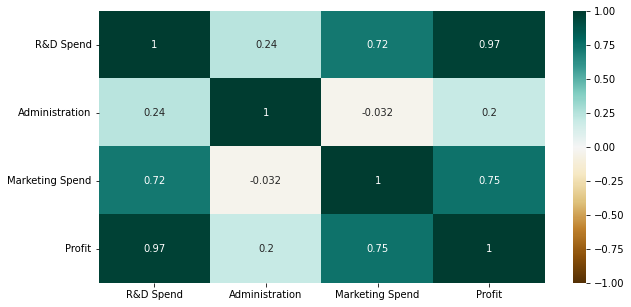

In [13]:
# Mapas gráfico
plt.figure(figsize=(10,5))
sns.heatmap(correlacao, vmin= -1, vmax= 1, annot=True, cmap='BrBG');

### Verificando quais variaveis são mais **Correlacionadas**

In [14]:
p = 0.75 # correlação mínima
var = []
for i in correlacao.columns:
    for j in correlacao.columns:
        if(i != j):
            if np.abs(correlacao [i][j]) > p: # se for maior do que |p|
                var.append([i,j])
print('Variáveis mais correlacionadas:\n', var)

Variáveis mais correlacionadas:
 [['R&D Spend', 'Profit'], ['Profit', 'R&D Spend']]


**Conclusão:**  R&D Spend: Gastos ou custos com Pesquisa e desenvolvimento da empresa é o gasto que tem maior correlação com o lucro.

#### Verificando **Outliers**

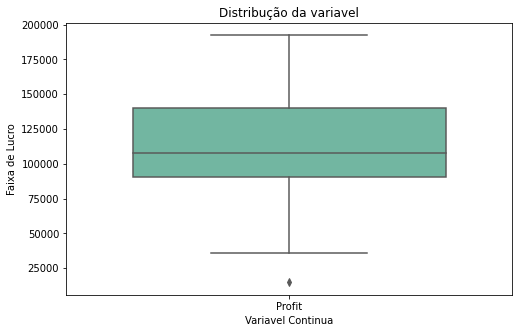

In [15]:
# Variavel Lucro
outliers = ['Profit']
plt.rcParams['figure.figsize'] = [8,5]
sns.boxplot(data=dados[outliers], orient="v", palette="Set2" , width=0.7) # orient = "v" : vertical boxplot , 
                                                                            # orient = "h" : hotrizontal boxplot
plt.title("Distribução da variavel")
plt.ylabel("Faixa de Lucro")
plt.xlabel("Variavel Continua")

plt.show()

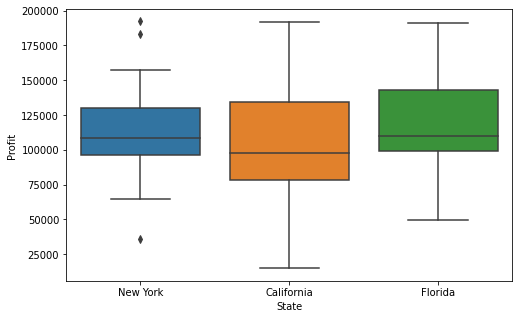

In [16]:
# Lucro em relação aos estados
sns.boxplot(x = 'State', y = 'Profit', data = dados)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


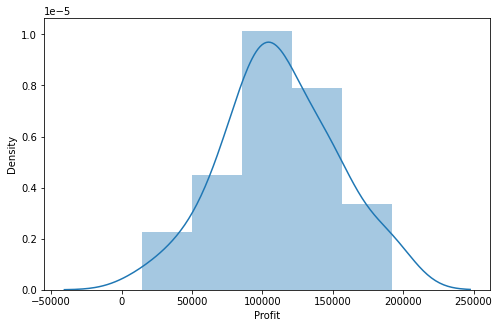

In [17]:
# Distriuição dos lucros
sns.distplot(dados['Profit'],bins=5,kde=True)
plt.show();

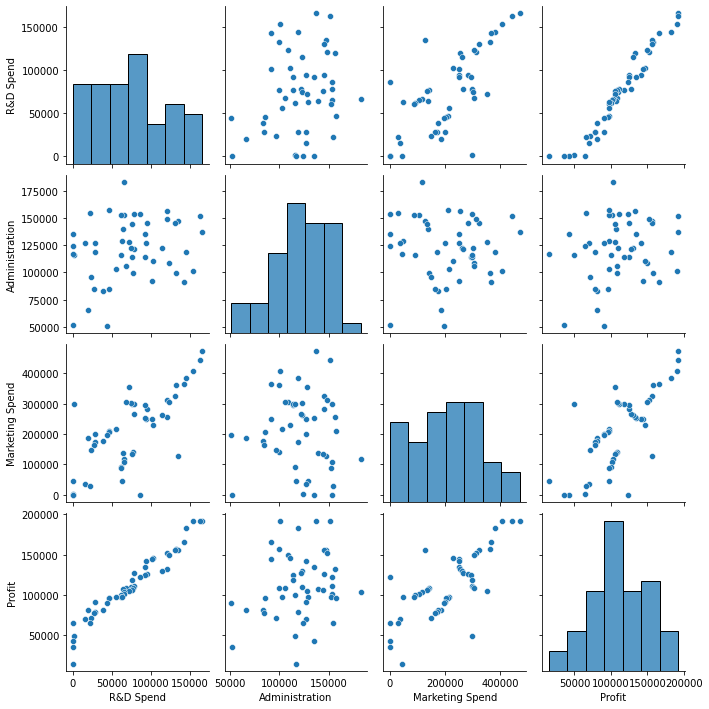

In [18]:
# Comportamento das variaveis
sns.pairplot(dados)
plt.show();

## 3° Pré-Processamento dos Dados

#### <font color = 'Tomato'> **Ordinal Encoder**</font>

In [19]:
# Instalando a Categória Encoder
!pip install Category_Encoders

     |████████████████████████████████| 86 kB 2.8 MB/s 


In [20]:
from category_encoders.ordinal import OrdinalEncoder

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
# Criando o codificador
ordinal_enc = OrdinalEncoder(cols=['State'])

In [22]:
# Transformando a coluna
df_transf = ordinal_enc.fit_transform(dados)
df_transf.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,2,191792.06
2,153441.51,101145.55,407934.54,3,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,3,166187.94


In [23]:
# Separando as variáveis explicativas e o Target (Profit)
X = df_transf.iloc[:, :-1].values # Ou df_transf.iloc[:,:6]
y = df_transf.iloc[:, 4].values   # df_transf.iloc[:,4]

In [ ]:
X

### <font color = 'Tomato'> **Normalização**</font>

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
normalizacao = MinMaxScaler()
X_novo = normalizacao.fit_transform(X)

In [ ]:
X_novo

### **Separando os dados de treino e teste**

In [28]:
# Fazendo a Amostragem dos Dados em Traino e Teste
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_novo,y,train_size=0.7,random_state=0)

In [ ]:
# Visualizando o X_train
x_train

In [ ]:
# Visualizando o y_train
y_train

## 4° Construção da Máquina Preditiva

In [31]:
# Criando o modelo de regressão Linear
from sklearn.linear_model import LinearRegression

# Criando a Máquina Preditiva
maquina = LinearRegression()

In [32]:
# Treinando a máquina preditiva
maquina.fit(x_train,y_train)
print('A máquina Preditiva foi Treinada com Sucesso!')

A máquina Preditiva foi Treinada com Sucesso!


In [33]:
# Fazendo Predições com dados que a Máquina Preditiva nunca viu (x_test) para avaliar sua assertividade
y_pred = maquina.predict(x_test)
y_pred

array([104077.17933248, 132727.13477682, 133668.52320374,  72317.11294226,
       179713.5827609 , 114483.9131603 ,  66285.40397576,  98282.01455475,
       114297.42892653, 169141.42147682,  96280.00382793,  87898.53577434,
       110713.66785768,  90667.3074485 , 127803.87875368])

## 5° Avaliação da Máquina Preditiva

In [34]:
dados_teste = maquina.score(x_test, y_test)
print("A Performance(Score) do modelo com os dados de teste é de : ",dados_teste, '\n')

dados_treino = maquina.score(x_train, y_train)
print("A Performance(Score) do modelo com os dados de treino é de : ",dados_treino)

A Performance(Score) do modelo com os dados de teste é de :  0.935556965769097 

A Performance(Score) do modelo com os dados de treino é de :  0.9515392599290323


#### Comparando os valores **Reais** e **Preditos**

In [35]:
# Criando um dataframe para comparar os valores reais e valores preditos pela MP
df = pd.DataFrame(data={'Valor Predito':y_pred.flatten(),'Valor Real':y_test.flatten()})
df

,Valor Predito,Valor Real
0,104077.179332,103282.38
1,132727.134777,144259.40
2,133668.523204,146121.95
3,72317.112942,77798.83
4,179713.582761,191050.39
5,114483.913160,105008.31
6,66285.403976,81229.06
7,98282.014555,97483.56
8,114297.428927,110352.25
9,169141.421477,166187.94


#### Coeficiente de determinação **R2**

In [39]:
# Avaliando com outra métrica: R2
from sklearn.metrics import r2_score

# Calculando o Coeficiente de determinação
r2Score = r2_score(y_pred, y_test).round(3)
print("O R2 scor do modelo é:" ,r2Score*100)

O R2 scor do modelo é: 93.4


#### Erro Médio Absoluto (**MAE**)

In [40]:
# Avaliando com outra métrica: MAE
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_pred,y_test).round(2)
print("O Erro Médio Absoluto é :" ,mae)

O Erro Médio Absoluto é : 6490.53


##### O erro absoluto médio foi de 6490.53

- **Conclusão**: O nosso valor previsto pode ser *6490* unidades a mais ou a menos que o valor real.